In [2]:
import pandas as pd

In [3]:
export = pd.read_csv('export.csv')

In [4]:
export.head(n=10)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-784961211,1773350293,12,application_web_approved,2023-03-22T08:45:22.000Z,1
1,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,2
2,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,3
3,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,4
4,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,5
5,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,6
6,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,7
7,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,8
8,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,9
9,-784961211,1773350293,19,application_web_view,2023-03-22T13:32:10.000Z,10


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from lifelines import KaplanMeierFitter

In [7]:
event_def = pd.read_csv('Event_Definitions.csv')
event_def.head

<bound method NDFrame.head of                               event_name  journey_id  event_definition_id  \
0             application_phone_approved           1                   15   
1             application_phone_declined           1                   16   
2              application_phone_pending           1                   17   
3               application_web_approved           1                   12   
4               application_web_declined           1                   13   
5                application_web_pending           1                   14   
6                 application_web_submit           1                    3   
7                   application_web_view           1                   19   
8                   account_activitation           1                   29   
9                   account_fraud_review           1                   37   
10                        campaign_click           1                    2   
11    customer_requested_catalog_digital      

In [8]:
export['event_timestamp'].head()

0    2023-03-22T08:45:22.000Z
1    2023-03-22T13:32:10.000Z
2    2023-03-22T13:32:10.000Z
3    2023-03-22T13:32:10.000Z
4    2023-03-22T13:32:10.000Z
Name: event_timestamp, dtype: object

In [12]:
export['event_name'].unique()

array(['application_web_approved', 'application_web_view',
       'application_web_submit', 'campaign_click', 'browse_products',
       'add_to_cart', 'view_cart', 'promotion_created',
       'campaignemail_clicked', 'begin_checkout', 'place_order_phone',
       'account_activitation', 'account_downpaymentcleared',
       'order_shipped', 'application_web_declined', 'place_order_web',
       'application_phone_approved', 'account_downpaymentreceived',
       'place_downpayment', 'catalog_(mail)', 'site_registration',
       'pre-application_(3rd_party_affiliates)',
       'application_phone_declined', 'fingerhut_university',
       'catalog_(email)_(experian)', 'application_web_pending',
       'customer_requested_catalog_(digital)',
       'application_phone_pending'], dtype=object)

In [9]:
export_time_datetime = pd.to_datetime(export['event_timestamp'], errors='coerce')

In [10]:
export_shipped = export[export['event_name'] == 'order_shipped']
export_placed = export[export['event_name'] == 'place_downpayment']

In [39]:
export_dpc = export[export['event_name'] == 'account_downpaymentcleared']

In [40]:
len(export_dpc)

333704

In [41]:
export_time_to_clear = pd.merge(export_placed, export_dpc, on='customer_id', suffixes=('_placed', '_dpc'))

In [44]:
export_time_to_clear.head()

,customer_id,account_id_placed,ed_id_placed,event_name_placed,event_timestamp_placed,journey_steps_until_end_placed,account_id_dpc,ed_id_dpc,event_name_dpc,event_timestamp_dpc,journey_steps_until_end_dpc,export_timestamp_shipped,export_timestamp_placed
0,1035317138,420663751,8,place_downpayment,2023-03-05T16:33:59.000Z,69,420663751,27,account_downpaymentcleared,2023-03-06T00:00:00.000Z,79,2023-03-06 00:00:00+00:00,2023-03-05 16:33:59+00:00
1,1621825105,1696883893,8,place_downpayment,2022-06-12T17:19:49.000Z,73,1696883893,27,account_downpaymentcleared,2022-06-14T00:00:00.000Z,75,2022-06-14 00:00:00+00:00,2022-06-12 17:19:49+00:00
2,1621825105,1696883893,8,place_downpayment,2022-06-12T18:29:18.000Z,74,1696883893,27,account_downpaymentcleared,2022-06-14T00:00:00.000Z,75,2022-06-14 00:00:00+00:00,2022-06-12 18:29:18+00:00
3,940754364,-2103448386,8,place_downpayment,2022-01-24T17:21:18.000Z,196,-2103448386,27,account_downpaymentcleared,2022-01-26T00:00:00.000Z,197,2022-01-26 00:00:00+00:00,2022-01-24 17:21:18+00:00
4,1200046987,397759112,8,place_downpayment,2021-03-02T22:57:04.000Z,46,397759112,27,account_downpaymentcleared,2021-03-04T00:00:00.000Z,49,2021-03-04 00:00:00+00:00,2021-03-02 22:57:04+00:00


In [45]:
export_time_to_clear['export_timestamp_dpc'] = pd.to_datetime(export_time_to_clear['event_timestamp_dpc'])
export_time_to_clear['export_timestamp_placed'] = pd.to_datetime(export_time_to_clear['event_timestamp_placed'])
export_time_to_clear['difference'] = export_time_to_clear['export_timestamp_dpc'] - export_time_to_clear['export_timestamp_placed']
export_time_to_clear['difference'] = pd.to_timedelta(export_time_to_clear['difference'])
export_time_to_clear['days'] = export_time_to_clear['difference'].dt.days

In [46]:
export_time_to_clear.head()

,customer_id,account_id_placed,ed_id_placed,event_name_placed,event_timestamp_placed,journey_steps_until_end_placed,account_id_dpc,ed_id_dpc,event_name_dpc,event_timestamp_dpc,journey_steps_until_end_dpc,export_timestamp_shipped,export_timestamp_placed,export_timestamp_dpc,difference,days
0,1035317138,420663751,8,place_downpayment,2023-03-05T16:33:59.000Z,69,420663751,27,account_downpaymentcleared,2023-03-06T00:00:00.000Z,79,2023-03-06 00:00:00+00:00,2023-03-05 16:33:59+00:00,2023-03-06 00:00:00+00:00,0 days 07:26:01,0
1,1621825105,1696883893,8,place_downpayment,2022-06-12T17:19:49.000Z,73,1696883893,27,account_downpaymentcleared,2022-06-14T00:00:00.000Z,75,2022-06-14 00:00:00+00:00,2022-06-12 17:19:49+00:00,2022-06-14 00:00:00+00:00,1 days 06:40:11,1
2,1621825105,1696883893,8,place_downpayment,2022-06-12T18:29:18.000Z,74,1696883893,27,account_downpaymentcleared,2022-06-14T00:00:00.000Z,75,2022-06-14 00:00:00+00:00,2022-06-12 18:29:18+00:00,2022-06-14 00:00:00+00:00,1 days 05:30:42,1
3,940754364,-2103448386,8,place_downpayment,2022-01-24T17:21:18.000Z,196,-2103448386,27,account_downpaymentcleared,2022-01-26T00:00:00.000Z,197,2022-01-26 00:00:00+00:00,2022-01-24 17:21:18+00:00,2022-01-26 00:00:00+00:00,1 days 06:38:42,1
4,1200046987,397759112,8,place_downpayment,2021-03-02T22:57:04.000Z,46,397759112,27,account_downpaymentcleared,2021-03-04T00:00:00.000Z,49,2021-03-04 00:00:00+00:00,2021-03-02 22:57:04+00:00,2021-03-04 00:00:00+00:00,1 days 01:02:56,1


In [38]:
export_shipped.head(n=5)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
394,-1257367741,1076891306,28,order_shipped,2023-01-17T00:00:00.000Z,45
639,1406169052,-405387821,28,order_shipped,2021-06-01T00:00:00.000Z,8
736,1035317138,420663751,28,order_shipped,2023-03-08T00:00:00.000Z,80
812,1621825105,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76
838,1896716214,-1415717586,28,order_shipped,2021-12-23T00:00:00.000Z,10


In [13]:
len(export_shipped)

322949

In [14]:
len(export_placed)

428050

In [ ]:
export_time_to_downpayment

In [15]:
# Merge to get the time for 'order placed' and 'order shipped' in the same row
export_time_to_ship = pd.merge(export_placed, export_shipped, on='customer_id', suffixes=('_placed', '_shipped'))

In [42]:
export_time_to_ship.head(n=5)

,customer_id,account_id_placed,ed_id_placed,event_name_placed,event_timestamp_placed,journey_steps_until_end_placed,account_id_shipped,ed_id_shipped,event_name_shipped,event_timestamp_shipped,journey_steps_until_end_shipped,export_timestamp_shipped,export_timestamp_placed,difference,days
0,1035317138,420663751,8,place_downpayment,2023-03-05T16:33:59.000Z,69,420663751,28,order_shipped,2023-03-08T00:00:00.000Z,80,2023-03-08 00:00:00+00:00,2023-03-05 16:33:59+00:00,2 days 07:26:01,2
1,1621825105,1696883893,8,place_downpayment,2022-06-12T17:19:49.000Z,73,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17 00:00:00+00:00,2022-06-12 17:19:49+00:00,4 days 06:40:11,4
2,1621825105,1696883893,8,place_downpayment,2022-06-12T18:29:18.000Z,74,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17 00:00:00+00:00,2022-06-12 18:29:18+00:00,4 days 05:30:42,4
3,940754364,-2103448386,8,place_downpayment,2022-01-24T17:21:18.000Z,196,-2103448386,28,order_shipped,2022-01-28T00:00:00.000Z,198,2022-01-28 00:00:00+00:00,2022-01-24 17:21:18+00:00,3 days 06:38:42,3
4,1200046987,397759112,8,place_downpayment,2021-03-02T22:57:04.000Z,46,397759112,28,order_shipped,2021-03-05T00:00:00.000Z,50,2021-03-05 00:00:00+00:00,2021-03-02 22:57:04+00:00,2 days 01:02:56,2


In [17]:
export_time_to_ship['event_timestamp_shipped']

0         2023-03-08T00:00:00.000Z
1         2022-06-17T00:00:00.000Z
2         2022-06-17T00:00:00.000Z
3         2022-01-28T00:00:00.000Z
4         2021-03-05T00:00:00.000Z
                    ...           
402424    2023-08-16T00:00:00.000Z
402425    2023-09-05T00:00:00.000Z
402426    2023-08-29T00:00:00.000Z
402427    2023-08-29T00:00:00.000Z
402428    2021-05-18T00:00:00.000Z
Name: event_timestamp_shipped, Length: 402429, dtype: object

In [18]:
export_time_to_ship['export_timestamp_shipped'] = pd.to_datetime(export_time_to_ship['event_timestamp_shipped'])
export_time_to_ship['export_timestamp_placed'] = pd.to_datetime(export_time_to_ship['event_timestamp_placed'])


In [19]:
export_time_to_ship['difference'] = export_time_to_ship['export_timestamp_shipped'] - export_time_to_ship['export_timestamp_placed']

In [20]:
export_time_to_ship.head()

,customer_id,account_id_placed,ed_id_placed,event_name_placed,event_timestamp_placed,journey_steps_until_end_placed,account_id_shipped,ed_id_shipped,event_name_shipped,event_timestamp_shipped,journey_steps_until_end_shipped,export_timestamp_shipped,export_timestamp_placed,difference
0,1035317138,420663751,8,place_downpayment,2023-03-05T16:33:59.000Z,69,420663751,28,order_shipped,2023-03-08T00:00:00.000Z,80,2023-03-08 00:00:00+00:00,2023-03-05 16:33:59+00:00,2 days 07:26:01
1,1621825105,1696883893,8,place_downpayment,2022-06-12T17:19:49.000Z,73,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17 00:00:00+00:00,2022-06-12 17:19:49+00:00,4 days 06:40:11
2,1621825105,1696883893,8,place_downpayment,2022-06-12T18:29:18.000Z,74,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17 00:00:00+00:00,2022-06-12 18:29:18+00:00,4 days 05:30:42
3,940754364,-2103448386,8,place_downpayment,2022-01-24T17:21:18.000Z,196,-2103448386,28,order_shipped,2022-01-28T00:00:00.000Z,198,2022-01-28 00:00:00+00:00,2022-01-24 17:21:18+00:00,3 days 06:38:42
4,1200046987,397759112,8,place_downpayment,2021-03-02T22:57:04.000Z,46,397759112,28,order_shipped,2021-03-05T00:00:00.000Z,50,2021-03-05 00:00:00+00:00,2021-03-02 22:57:04+00:00,2 days 01:02:56


In [21]:
export_time_to_ship['difference'] = pd.to_timedelta(export_time_to_ship['difference'])

In [22]:
export_time_to_ship['days'] = export_time_to_ship['difference'].dt.days

In [23]:
export_time_to_ship.head()

,customer_id,account_id_placed,ed_id_placed,event_name_placed,event_timestamp_placed,journey_steps_until_end_placed,account_id_shipped,ed_id_shipped,event_name_shipped,event_timestamp_shipped,journey_steps_until_end_shipped,export_timestamp_shipped,export_timestamp_placed,difference,days
0,1035317138,420663751,8,place_downpayment,2023-03-05T16:33:59.000Z,69,420663751,28,order_shipped,2023-03-08T00:00:00.000Z,80,2023-03-08 00:00:00+00:00,2023-03-05 16:33:59+00:00,2 days 07:26:01,2
1,1621825105,1696883893,8,place_downpayment,2022-06-12T17:19:49.000Z,73,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17 00:00:00+00:00,2022-06-12 17:19:49+00:00,4 days 06:40:11,4
2,1621825105,1696883893,8,place_downpayment,2022-06-12T18:29:18.000Z,74,1696883893,28,order_shipped,2022-06-17T00:00:00.000Z,76,2022-06-17 00:00:00+00:00,2022-06-12 18:29:18+00:00,4 days 05:30:42,4
3,940754364,-2103448386,8,place_downpayment,2022-01-24T17:21:18.000Z,196,-2103448386,28,order_shipped,2022-01-28T00:00:00.000Z,198,2022-01-28 00:00:00+00:00,2022-01-24 17:21:18+00:00,3 days 06:38:42,3
4,1200046987,397759112,8,place_downpayment,2021-03-02T22:57:04.000Z,46,397759112,28,order_shipped,2021-03-05T00:00:00.000Z,50,2021-03-05 00:00:00+00:00,2021-03-02 22:57:04+00:00,2 days 01:02:56,2


In [28]:
from mpl_toolkits.axes_grid1 import Divider, Size

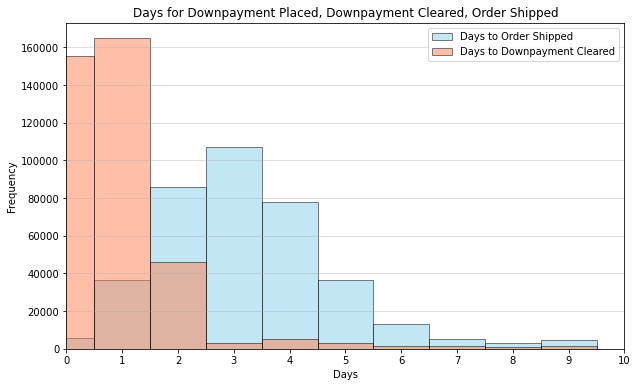

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(export_time_to_ship['days'], bins=range(11), align='left', color='skyblue', edgecolor='black', alpha=0.5, label='Days to Order Shipped')
plt.hist(export_time_to_clear['days'], bins=range(11), align='left', color='coral', edgecolor='black', alpha = 0.5, label='Days to Downpayment Cleared')

plt.title('Days for Downpayment Placed, Downpayment Cleared, Order Shipped')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(range(11))  
plt.xlim(0, 10)  
plt.grid(axis='y', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [72]:
print((export_time_to_clear['days']>=10).sum())
print((export_time_to_ship['days']>=10).sum())

15695
26686


In [80]:
print(export_time_to_clear['days'].max())
print(export_time_to_ship['days'].max())

976
957


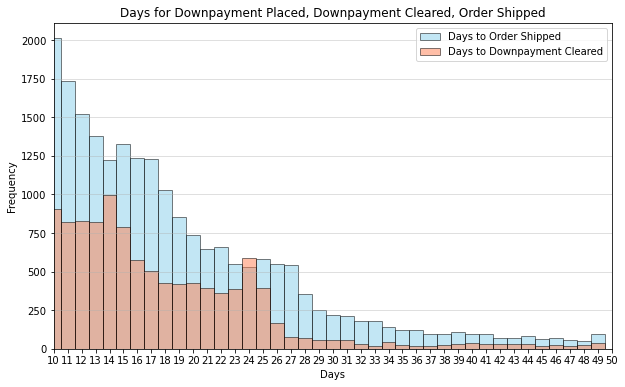

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(export_time_to_ship['days'], bins=range(10,51), align='left', color='skyblue', edgecolor='black', alpha=0.5, label='Days to Order Shipped')
plt.hist(export_time_to_clear['days'], bins=range(10,51), align='left', color='coral', edgecolor='black', alpha = 0.5, label='Days to Downpayment Cleared')

plt.title('Days for Downpayment Placed, Downpayment Cleared, Order Shipped')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(range(51))
plt.xlim(10, 50)  
plt.grid(axis='y', alpha=0.5)
plt.legend(loc='upper right')
plt.show()